In [1]:
#carregando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import plotly.express as px

In [2]:
#Funções
def create_metadata(df):
    df_aux = pd.DataFrame(data={
    'colunas':df.columns,
    'missing':df.isna().sum(),
    'qtd':df.shape[0]
    })
    df_aux['tx_miss'] = round(df_aux['missing']/df_aux['qtd'],2)
    return df_aux

In [164]:
#carregando base de dados de mercado
df_market = pd.read_csv('../data/estaticos_market.csv')

In [165]:
idx = df_market.shape[0]
df_market['Empresa'] = [f'Empresa {i}' for i in np.arange(0,idx,1)]

In [166]:
#tamanho do dataframe
df_market = df_market.drop(['Unnamed: 0'],axis=1)
#df_market = df_market.set_index('id')
df_market.shape

(462298, 182)

## Análise Exploratória dos dados

### 1. Criação dataframe com metadados

In [167]:
#calcular missing values 
df_aux = pd.DataFrame(data={
    'colunas':df_market.columns,
    'tipos':df_market.dtypes,
    'missing':df_market.isna().sum(),
    'qtd':df_market.shape[0],
    'unicos':df_market.nunique()
})

In [168]:
df_aux

,colunas,tipos,missing,qtd,unicos
id,id,object,0,462298,462298
fl_matriz,fl_matriz,bool,0,462298,2
de_natureza_juridica,de_natureza_juridica,object,0,462298,67
sg_uf,sg_uf,object,0,462298,6
natureza_juridica_macro,natureza_juridica_macro,object,0,462298,7
...,...,...,...,...,...
tx_crescimento_12meses,tx_crescimento_12meses,float64,388410,462298,2237
tx_crescimento_24meses,tx_crescimento_24meses,float64,388284,462298,3388
tx_rotatividade,tx_rotatividade,float64,358724,462298,2548
qt_filiais,qt_filiais,int64,0,462298,304


In [169]:
#calcular taxa de missing values
df_aux['tx_miss'] = round(df_aux['missing']/df_aux['qtd'],2)

In [170]:
#exportando metadados para CSV
df_aux.to_csv('metadados.csv',index=False)

### 2. Exploração dos dados faltantes

In [171]:
#calculando % das variáveis acima de 15% de dados faltantes
tx_missing = np.arange(0.1,1.00,0.01)
total_missing = list()
for tx in tx_missing:
    total_missing = df_aux.query(f'tx_miss >= {tx}').shape[0]/df_aux.shape[0]
    print(f"Total de campos com dados >= {round(tx*100,2)}% faltantes- {df_aux.query(f'tx_miss >= {tx}').shape[0]}")
    print(f"Porcentagem de variáveis com >= {round(tx*100,2)}% de dados faltantes: {round(total_missing*100,2)}%")
    print('\n')

Total de campos com dados >= 10.0% faltantes- 144
Porcentagem de variáveis com >= 10.0% de dados faltantes: 79.12%


Total de campos com dados >= 11.0% faltantes- 143
Porcentagem de variáveis com >= 11.0% de dados faltantes: 78.57%


Total de campos com dados >= 12.0% faltantes- 143
Porcentagem de variáveis com >= 12.0% de dados faltantes: 78.57%


Total de campos com dados >= 13.0% faltantes- 143
Porcentagem de variáveis com >= 13.0% de dados faltantes: 78.57%


Total de campos com dados >= 14.0% faltantes- 141
Porcentagem de variáveis com >= 14.0% de dados faltantes: 77.47%


Total de campos com dados >= 15.0% faltantes- 141
Porcentagem de variáveis com >= 15.0% de dados faltantes: 77.47%


Total de campos com dados >= 16.0% faltantes- 141
Porcentagem de variáveis com >= 16.0% de dados faltantes: 77.47%


Total de campos com dados >= 17.0% faltantes- 141
Porcentagem de variáveis com >= 17.0% de dados faltantes: 77.47%


Total de campos com dados >= 18.0% faltantes- 141
Porcentagem de

### Pela observação, temos colunas com mais do que 99.5% de dados faltantes, desta forma faremos a remoção destas colunas antes do prosseguimento das análises

In [172]:
#Removendo colunas com valores acima de 99.5% de dados faltantes
df_market_droped = df_market.drop(list(df_aux.query(f'tx_miss >= {0.995}').colunas),axis=1)

### Conclusão:
- Dados faltantes são um desafio no dataset
- Uma exploração maior deve ser feita sobre os dados faltantes

### 2. Estudos para entender o comportamento das variáveis com dados faltantes
1. Entender o comportamento dos dados faltantes com base na variável _de_ramo_ 

#### 1. Comportamento dos dados faltantes com base na variável de_ramo

In [173]:
#criando vetor com os ramos de atividades
de_ramo = df_market_droped.de_ramo.unique()

In [174]:
#criando dataframe para receber os valores missing de cada categoria de_ramo
df_compare_missing = pd.DataFrame(data={'variaveis':df_market_droped.columns})

In [175]:
#criação do dataframe com os valores missing para cada váriavel da coluna de_ramo
for ramo in de_ramo:
    df_ramo = df_market_droped.query(f'de_ramo == "{ramo}"')
    df_aux = create_metadata(df_ramo)
    #df_aux.rename(columns={'tx_miss':ramo},inplace=True)
    df_compare_missing.insert(1,ramo,df_aux.tx_miss.values)
df_compare_missing

,variaveis,FARMACEUTICA,ORGANISMOS INTERNACIONAIS,INDUSTRIA AUTOMOTIVA,SERVICOS SOCIAIS,ATIVIDADES IMOBILIARIAS,SERVICOS DE SANEAMENTO BASICO,ELETROELETRONICOS,INDUSTRIAS EXTRATIVAS,ELETRICIDADE E GAS,...,INDUSTRIA DIGITAL,COMERCIO VAREJISTA,BENS DE CONSUMO,SERVICOS ADMINISTRATIVOS,QUIMICA-PETROQUIMICA,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVICOS DIVERSOS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVICOS DE ALOJAMENTO/ALIMENTACAO,INDUSTRIA DA CONSTRUCAO
0,id,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,fl_matriz,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,de_natureza_juridica,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,sg_uf,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,natureza_juridica_macro,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,tx_crescimento_12meses,0.91,0.89,0.69,0.83,0.80,0.74,0.69,0.73,0.80,...,0.82,0.83,0.83,0.79,0.71,0.86,0.95,0.83,0.83,0.85
165,tx_crescimento_24meses,0.86,0.89,0.69,0.82,0.79,0.74,0.68,0.73,0.79,...,0.82,0.83,0.83,0.79,0.71,0.86,0.95,0.83,0.83,0.85
166,tx_rotatividade,0.77,0.78,0.60,0.79,0.68,0.66,0.61,0.64,0.76,...,0.73,0.76,0.77,0.71,0.63,0.80,0.93,0.76,0.76,0.77
167,qt_filiais,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [176]:
#configurando o indice do dataframe para ser as variáveis
df_compare_missing.set_index('variaveis',inplace=True)

In [177]:
#Observando o desvio padrão entre o total de missing values entre as variáveis
df_compare_missing.T.std().describe()

count    169.000000
mean       0.129902
std        0.077460
min        0.000000
25%        0.064953
50%        0.164633
75%        0.211644
max        0.213099
dtype: float64

In [17]:
#grafico com a quantidade de valores nulos por coluna para cada categoria
fig = go.Figure()
config = {'responsive': True}
for col in df_compare_missing.columns:
    fig.add_trace(go.Scatter(x=df_compare_missing.index,y=df_compare_missing[col],mode='lines',name=col,marker=dict(line_width=0.01)))
fig.update_layout(
    autosize=False,
    width=1024,
    height=800
)
fig.show(config=config)

### Conclusão:
1. Olhando pela perspectiva das categorias da variável de_ramo, utiilzar uma técnica para dropar colunas com uma taxa X de dados faltantes poderia penalizar certos ramos de atividade, conforme pode ser observado no caso de serviços financeiros. 
2. Uma possível estratégia para desenvolvimento dos modelos, seria criar datasets separados por ramo de atividade, para rodar os modelos.

### Seleção de feature clusterizando missing values por ramo de atividade

In [178]:
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

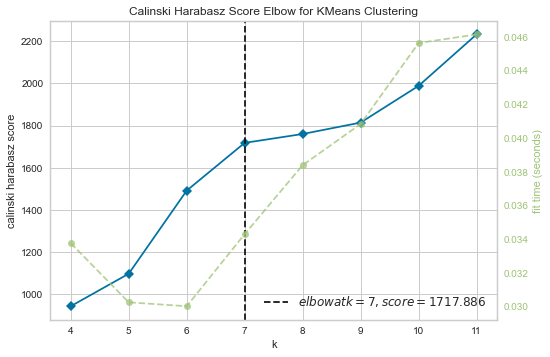

In [179]:
model = KMeans()
elbow_view = KElbowVisualizer(model,k=(4,12),metric='calinski_harabasz')
elbow_view.fit(df_compare_missing)
elbow_view.show()

In [184]:
df_cluster = df_compare_missing.T
kmeans_7_clusters = KMeans(n_clusters=7,random_state=42)
kmeans_7_clusters.fit(df_compare_missing)
cluster = kmeans_7_clusters.predict(df_compare_missing)
df_compare_missing['cluster'] = cluster

In [181]:
df_compare_missing

,FARMACEUTICA,ORGANISMOS INTERNACIONAIS,INDUSTRIA AUTOMOTIVA,SERVICOS SOCIAIS,ATIVIDADES IMOBILIARIAS,SERVICOS DE SANEAMENTO BASICO,ELETROELETRONICOS,INDUSTRIAS EXTRATIVAS,ELETRICIDADE E GAS,"SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE",...,COMERCIO VAREJISTA,BENS DE CONSUMO,SERVICOS ADMINISTRATIVOS,QUIMICA-PETROQUIMICA,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVICOS DIVERSOS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVICOS DE ALOJAMENTO/ALIMENTACAO,INDUSTRIA DA CONSTRUCAO,cluster
variaveis,,,,,,,,,,,,,,,,,,,,,
id,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
fl_matriz,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
de_natureza_juridica,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
sg_uf,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
natureza_juridica_macro,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tx_crescimento_12meses,0.91,0.89,0.69,0.83,0.80,0.74,0.69,0.73,0.80,0.81,...,0.83,0.83,0.79,0.71,0.86,0.95,0.83,0.83,0.85,0
tx_crescimento_24meses,0.86,0.89,0.69,0.82,0.79,0.74,0.68,0.73,0.79,0.82,...,0.83,0.83,0.79,0.71,0.86,0.95,0.83,0.83,0.85,0
tx_rotatividade,0.77,0.78,0.60,0.79,0.68,0.66,0.61,0.64,0.76,0.74,...,0.76,0.77,0.71,0.63,0.80,0.93,0.76,0.76,0.77,0


In [189]:
#Seleção do cluster para testar o modelo
cluster = df_compare_missing.query('cluster == 2')
columns = cluster.index.to_list()
cluster

,FARMACEUTICA,ORGANISMOS INTERNACIONAIS,INDUSTRIA AUTOMOTIVA,SERVICOS SOCIAIS,ATIVIDADES IMOBILIARIAS,SERVICOS DE SANEAMENTO BASICO,ELETROELETRONICOS,INDUSTRIAS EXTRATIVAS,ELETRICIDADE E GAS,"SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE",...,COMERCIO VAREJISTA,BENS DE CONSUMO,SERVICOS ADMINISTRATIVOS,QUIMICA-PETROQUIMICA,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVICOS DIVERSOS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVICOS DE ALOJAMENTO/ALIMENTACAO,INDUSTRIA DA CONSTRUCAO,cluster
variaveis,,,,,,,,,,,,,,,,,,,,,
id,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
fl_matriz,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
de_natureza_juridica,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
sg_uf,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
natureza_juridica_macro,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
de_ramo,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
idade_empresa_anos,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
idade_emp_cat,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
fl_me,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2


In [190]:
#criação do dataframe para testar o modelo
df_modelo = df_market[columns]
df_modelo = df_modelo.drop(['dt_situacao','Empresa'],axis=1)

In [191]:
#preprocessamento do dataframe
df_modelo = pd.get_dummies(df_modelo)

In [112]:
df_modelo.head(5)

,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,"de_faixa_faturamento_estimado_grupo_ATE R$ 81.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_grupo_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS","de_faixa_faturamento_estimado_grupo_DE R$ 81.000,01 A R$ 360.000,00"
id,,,,,,,,,,,,,,,,,,,,,
a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,14.457534,False,False,False,False,False,False,True,True,...,0,1,0,0,0,0,0,0,0,0
6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,True,1.463014,False,False,False,True,False,False,True,True,...,0,0,0,0,0,0,0,0,0,1
4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,True,7.093151,False,False,False,True,False,False,False,True,...,1,0,0,0,0,0,0,0,0,0
3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,True,6.512329,False,False,False,False,False,False,True,True,...,0,0,0,0,0,0,0,0,0,1
1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,True,3.200000,False,False,False,False,False,False,True,True,...,0,0,0,0,0,0,0,0,0,1


In [98]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

from surprise.model_selection import cross_validate
from surprise import SVD,KNNBasic
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader

In [113]:
df_modelo = df_modelo.dropna()
std = StandardScaler()

In [114]:
df_test = pd.read_csv('../data/estaticos_portfolio2.csv')
df_test = df_test.drop('Unnamed: 0',axis=1)
df_test = df_test.set_index('id')
df_test.head(5)

""
id
09e95c1a84049001d086470a8f320a19b076f955a89122ff8360ac2e4d6eca5d
dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728bb62194ca0842cce3e
16843c9ffb920170477118933798510d8d5f00f5c56c1221773356355bded321
ff045934d90aab184dd15e66daf3b3c97193bda5449298784b664681610609a0
a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf074dcd7e0c7dd50ae11


In [115]:
#criando dataframe standard dos dados de treino
df_std_train = std.fit_transform(df_modelo)

In [116]:
#coletando as variáveis do mercado 
df_test = df_test.merge(df_modelo,indicator=True,how='left',on='id').drop('_merge',axis=1).dropna()

In [119]:
#OneHotEncoding
df_test = pd.get_dummies(df_test)

In [120]:
#criando dataframe standar dos dados de test
df_std_test = std.fit_transform(df_test)

In [123]:
model_knn = NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20,n_jobs=-1)


In [124]:
model_knn.fit(df_std_train)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [152]:
distance, index = model_knn.kneighbors(df_std_test)

In [163]:
distance = distance.flatten()
index = index.flatten()

In [162]:
zip(distance.flatten(),index.flatten())

In [147]:
df_market.reset_index()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,Empresa
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0,Empresa 0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Empresa 1
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Empresa 2
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Empresa 3
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Empresa 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO E REPARACAO DE VEICULOS,COMERCIO,3.254795,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Empresa 462293
462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS ADMINISTRATIVOS,SERVIÇO,8.953425,5 a 10,False,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0,Empresa 462294
462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,True,ASSOCIACAO PRIVADA,MA,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS DE SAUDE,SERVIÇO,20.745205,> 20,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Empresa 462295
462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,True,SOCIEDADE EMPRESARIA LIMITADA,RO,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,1.909589,1 a 5,False,...,19.733333,2.400000,3.0,2.0,0.0,50.0,NaN,0.0,0,Empresa 462296


In [150]:
df_market.iloc[116524,:]

fl_matriz                                   True
de_natureza_juridica       EMPRESARIO INDIVIDUAL
sg_uf                                         PI
natureza_juridica_macro                   OUTROS
de_ramo                       COMERCIO VAREJISTA
                                   ...          
tx_crescimento_12meses                       NaN
tx_crescimento_24meses                       NaN
tx_rotatividade                              NaN
qt_filiais                                     0
Empresa                           Empresa 116524
Name: 425b78d07e4b0d86da5770ebf3016e064fa65beb0cb4d07c7816b7c0059cc456, Length: 181, dtype: object